# Importing Necessary Libraries

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
import statsmodels.api as sm
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12,3)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

# Load Dataset

In [18]:
al = pd.read_excel('Airlines+Data.xlsx')
al.rename({'Month':'Date'}, axis=1, inplace=True)

al

,Date,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


# EDA

In [19]:
al.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [20]:
al.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [21]:
al.isna().sum()

Date          0
Passengers    0
dtype: int64

# Separating Month and Year into Separate Column

In [22]:
al["month"] = al.Date.dt.strftime("%b")
al["year"]  = al.Date.dt.strftime("%Y")

al.head(10)

,Date,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
5,1995-06-01,135,Jun,1995
6,1995-07-01,148,Jul,1995
7,1995-08-01,148,Aug,1995
8,1995-09-01,136,Sep,1995
9,1995-10-01,119,Oct,1995


In [23]:
hm_y_m = pd.pivot_table(data=al,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)

hm_y_m

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
1995,129,148,118,118,112,148,135,132,121,104,119,136
1996,135,170,140,126,115,170,149,141,125,114,133,158
1997,163,199,166,150,145,199,178,178,172,146,162,184
1998,181,242,194,180,171,230,218,193,183,172,191,209
1999,235,272,201,196,196,264,243,236,229,180,211,237
2000,227,293,229,188,204,302,264,235,234,203,229,259
2001,269,347,278,233,242,364,315,267,270,237,274,312
2002,313,405,306,277,284,413,374,317,318,271,306,355


# Visualizing The Data

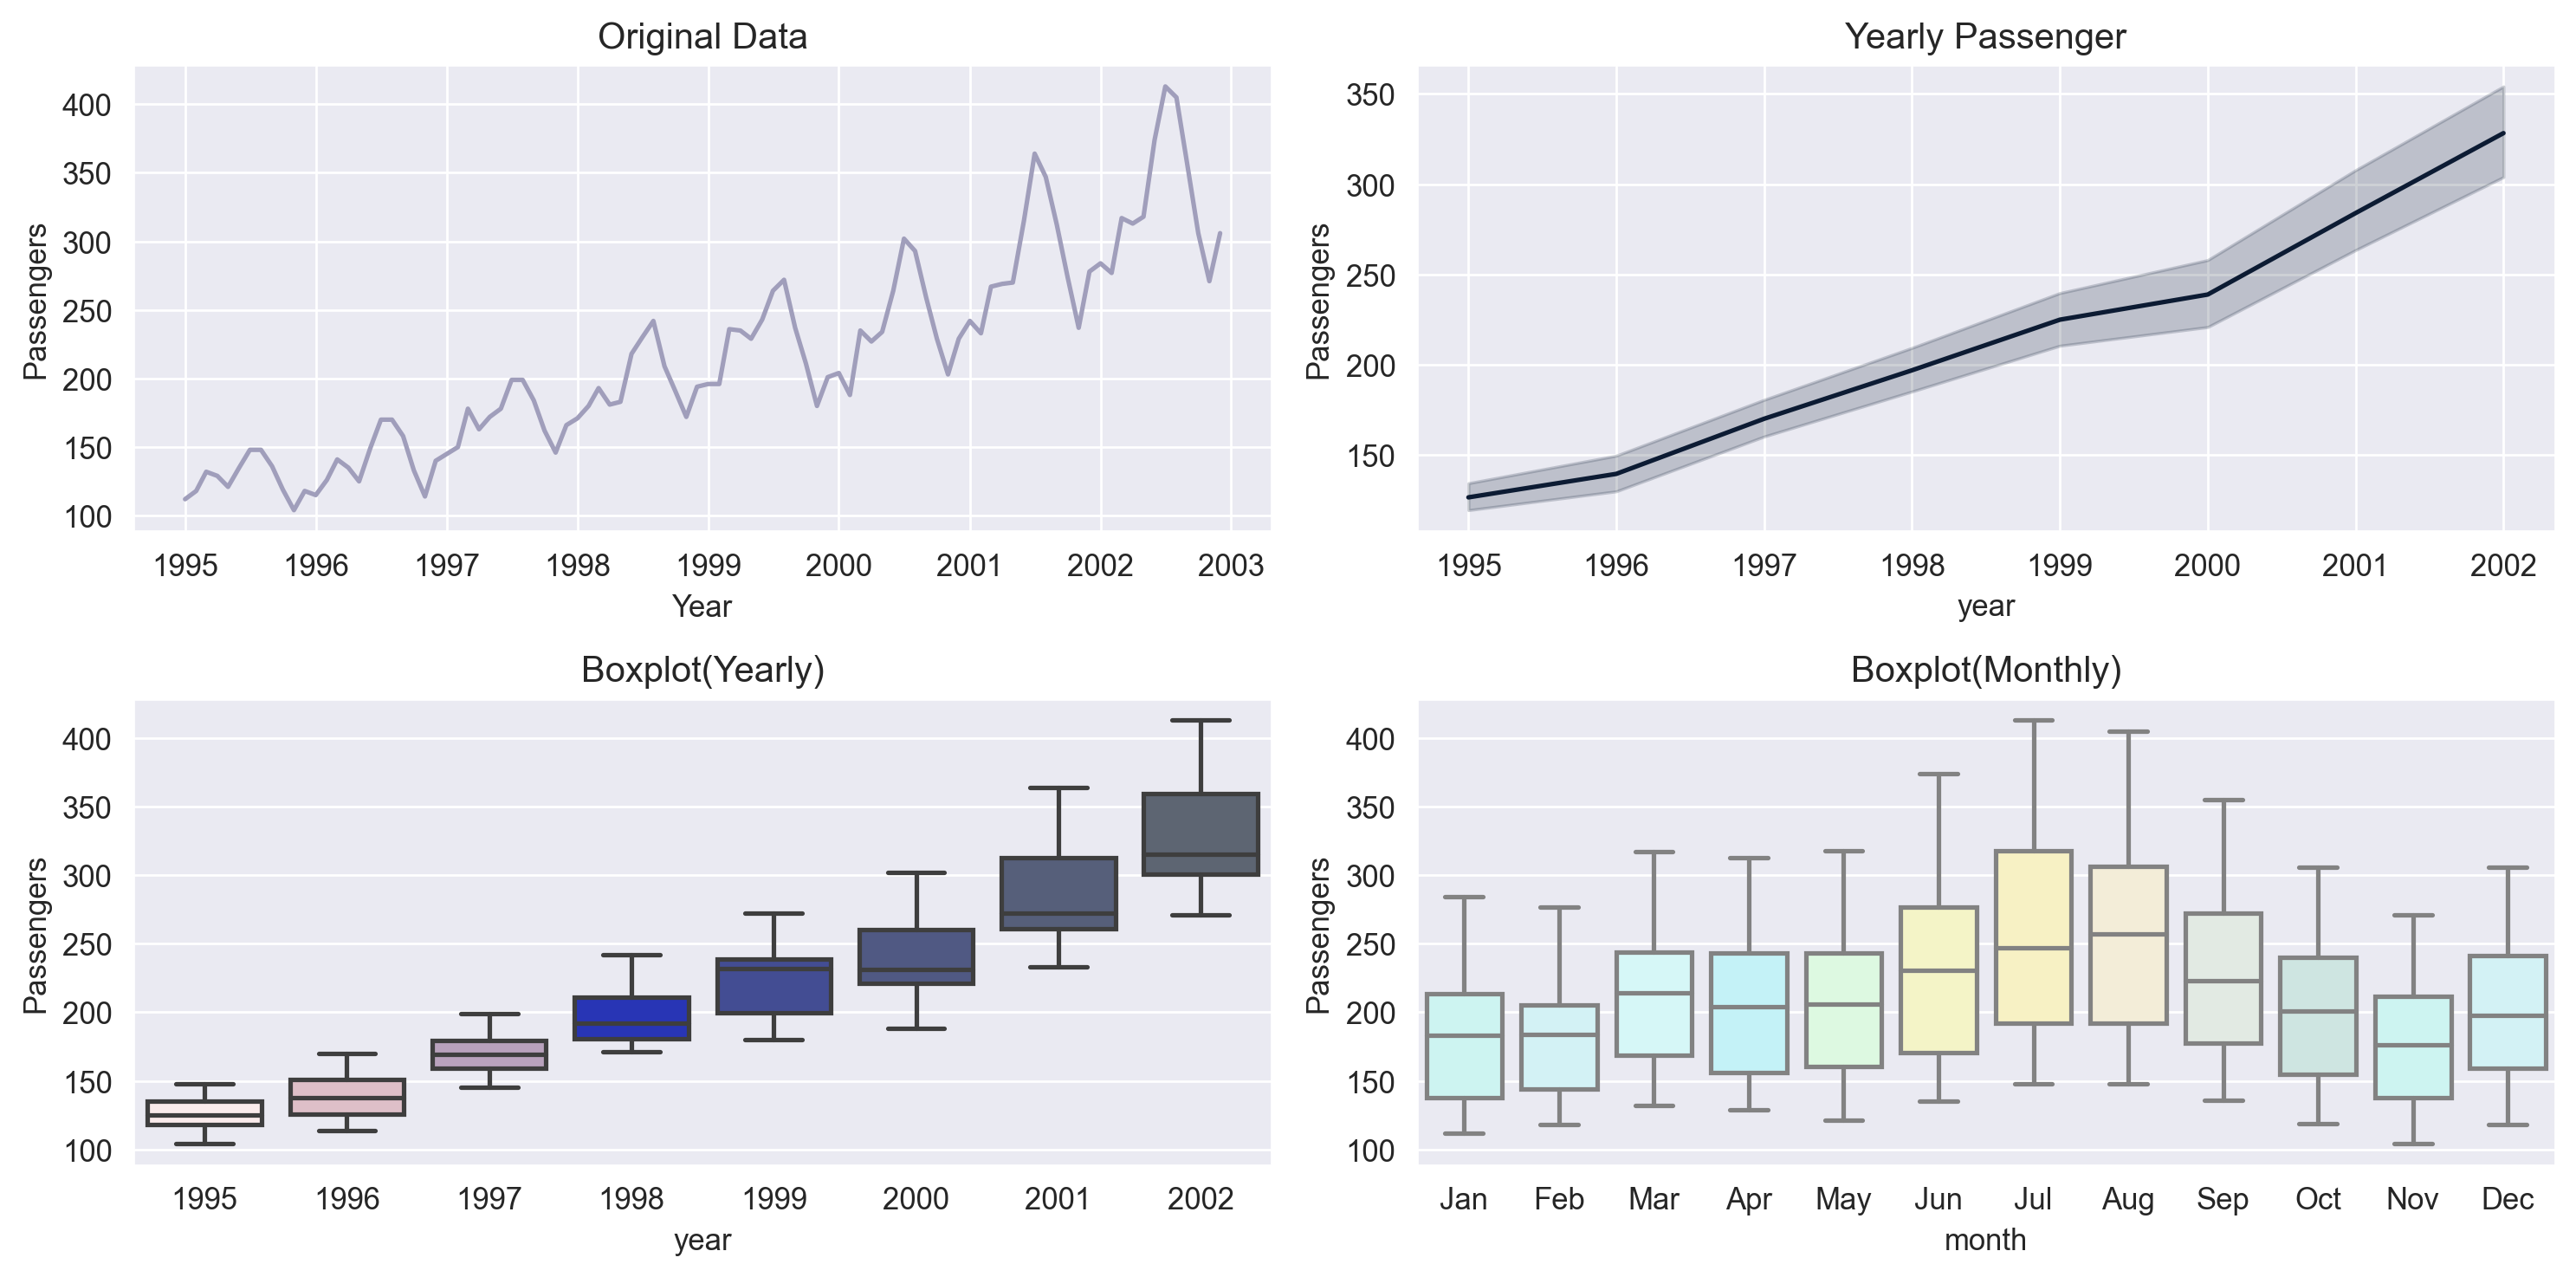

In [24]:
fig, ax = plt.subplots(2, 2, figsize=(12, 6))

plt.setp(ax[0, 0], title = 'Original Data')
plt.setp(ax[0, 0], xlabel='Year')
sns.lineplot(x = al['Date'], y = al['Passengers'], ax = ax[0, 0], color = '#a09ebb')

plt.setp(ax[0, 1], title = 'Yearly Passenger')
sns.lineplot(x=al['year'],y=al['Passengers'], ax = ax[0, 1] , color = "#0c1b33")

ax[1, 0].title.set_text('Boxplot(Yearly)')
sns.boxplot(x = 'year', y = 'Passengers', data = al, ax = ax[1, 0], palette = ['#fde8e9', '#e3bac6', '#bc9ec1', '#1122cc', '#3543a1', '#47548b', '#505c80', '#596475'])

ax[1, 1].title.set_text('Boxplot(Monthly)')
sns.boxplot(x = 'month', y = 'Passengers', data = al, ax = ax[1, 1], palette = ['#c6fbf6', '#cdf7fb', '#d0fcfd', '#bbf9ff', '#d8fede', '#fbfcbf', '#fff8bc', '#f7efd4', '#e1ebe2', '#cae9e4'])

plt.tight_layout()

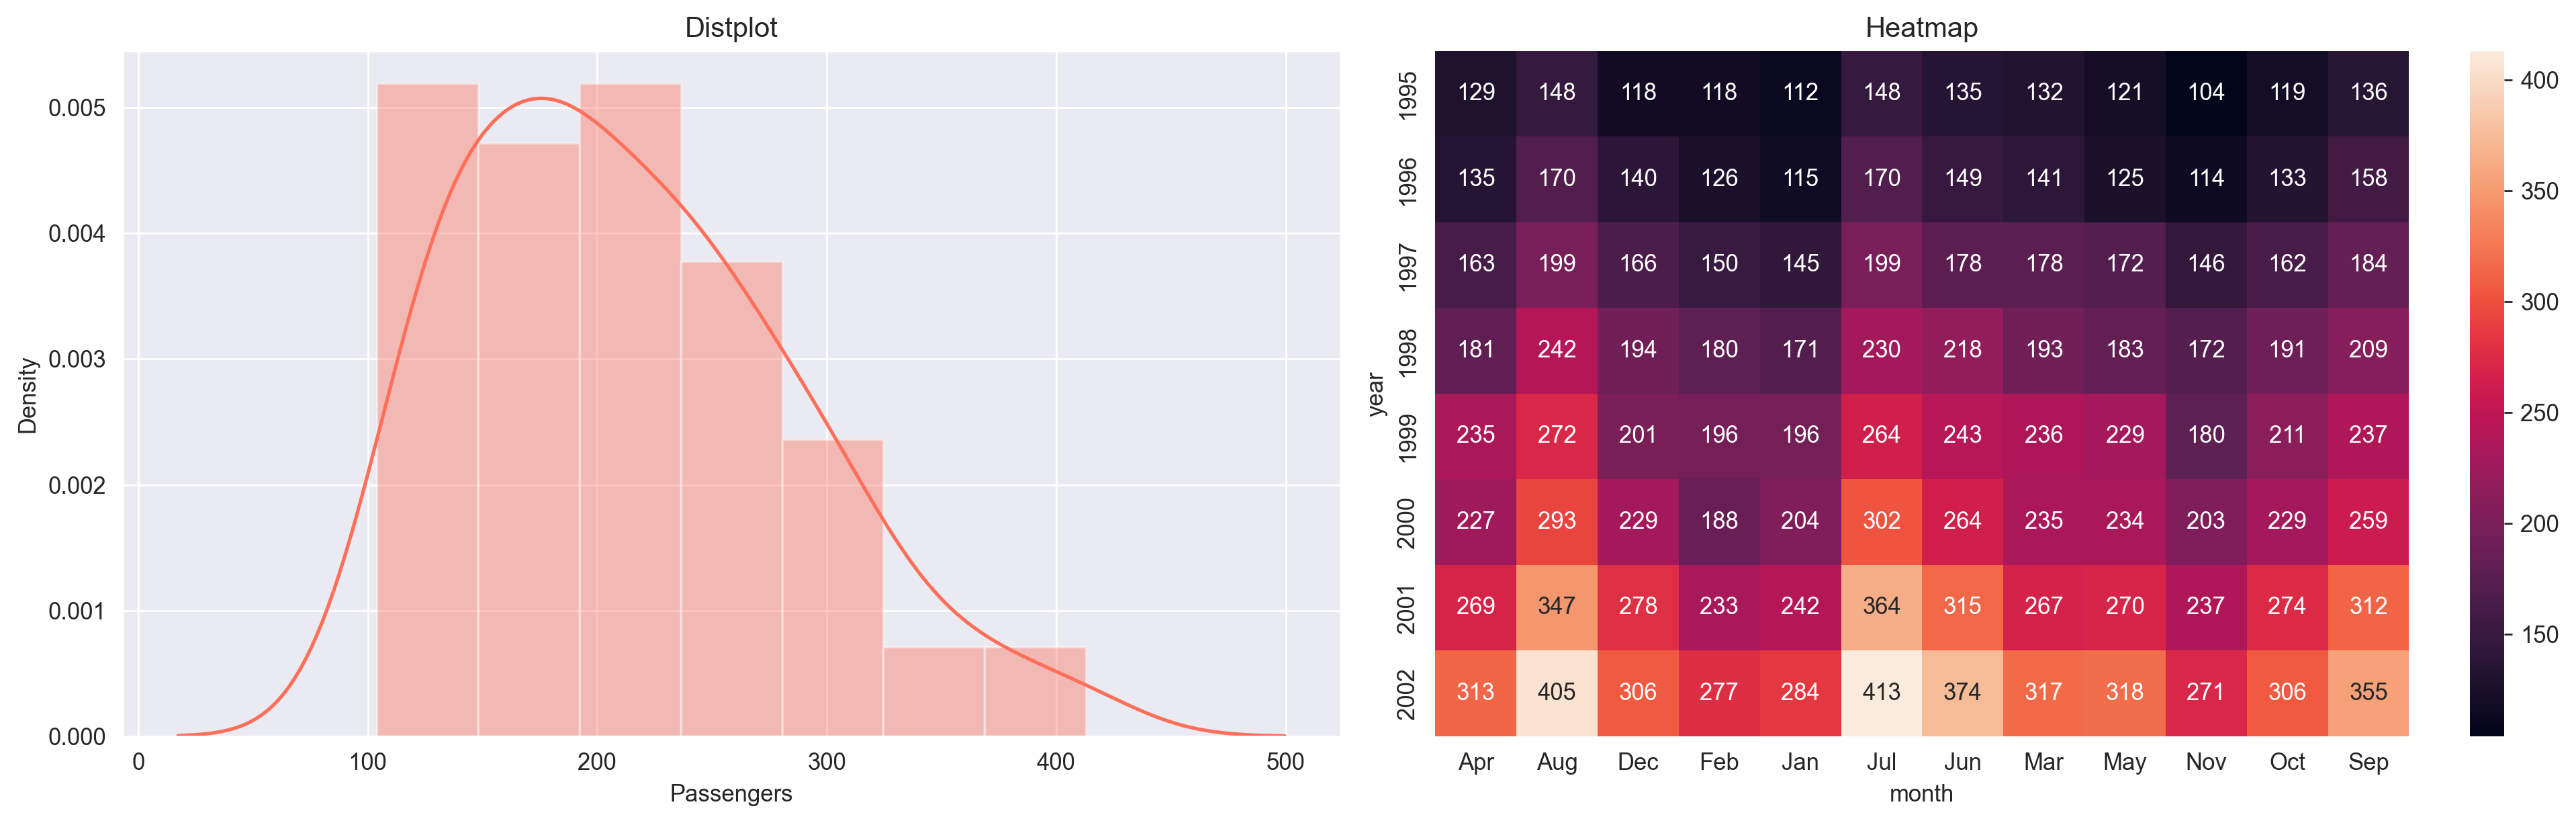

In [25]:
fig, ax = plt.subplots(ncols = 2, figsize=(16, 5))

ax[0].title.set_text('Distplot')
sns.distplot(al['Passengers'], color = '#ff6f59', ax=ax[0])

ax[1].title.set_text('Heatmap')
sns.heatmap(hm_y_m, annot = True, fmt="g", ax = ax[1])

plt.tight_layout()

# Preparing Lag-Plot

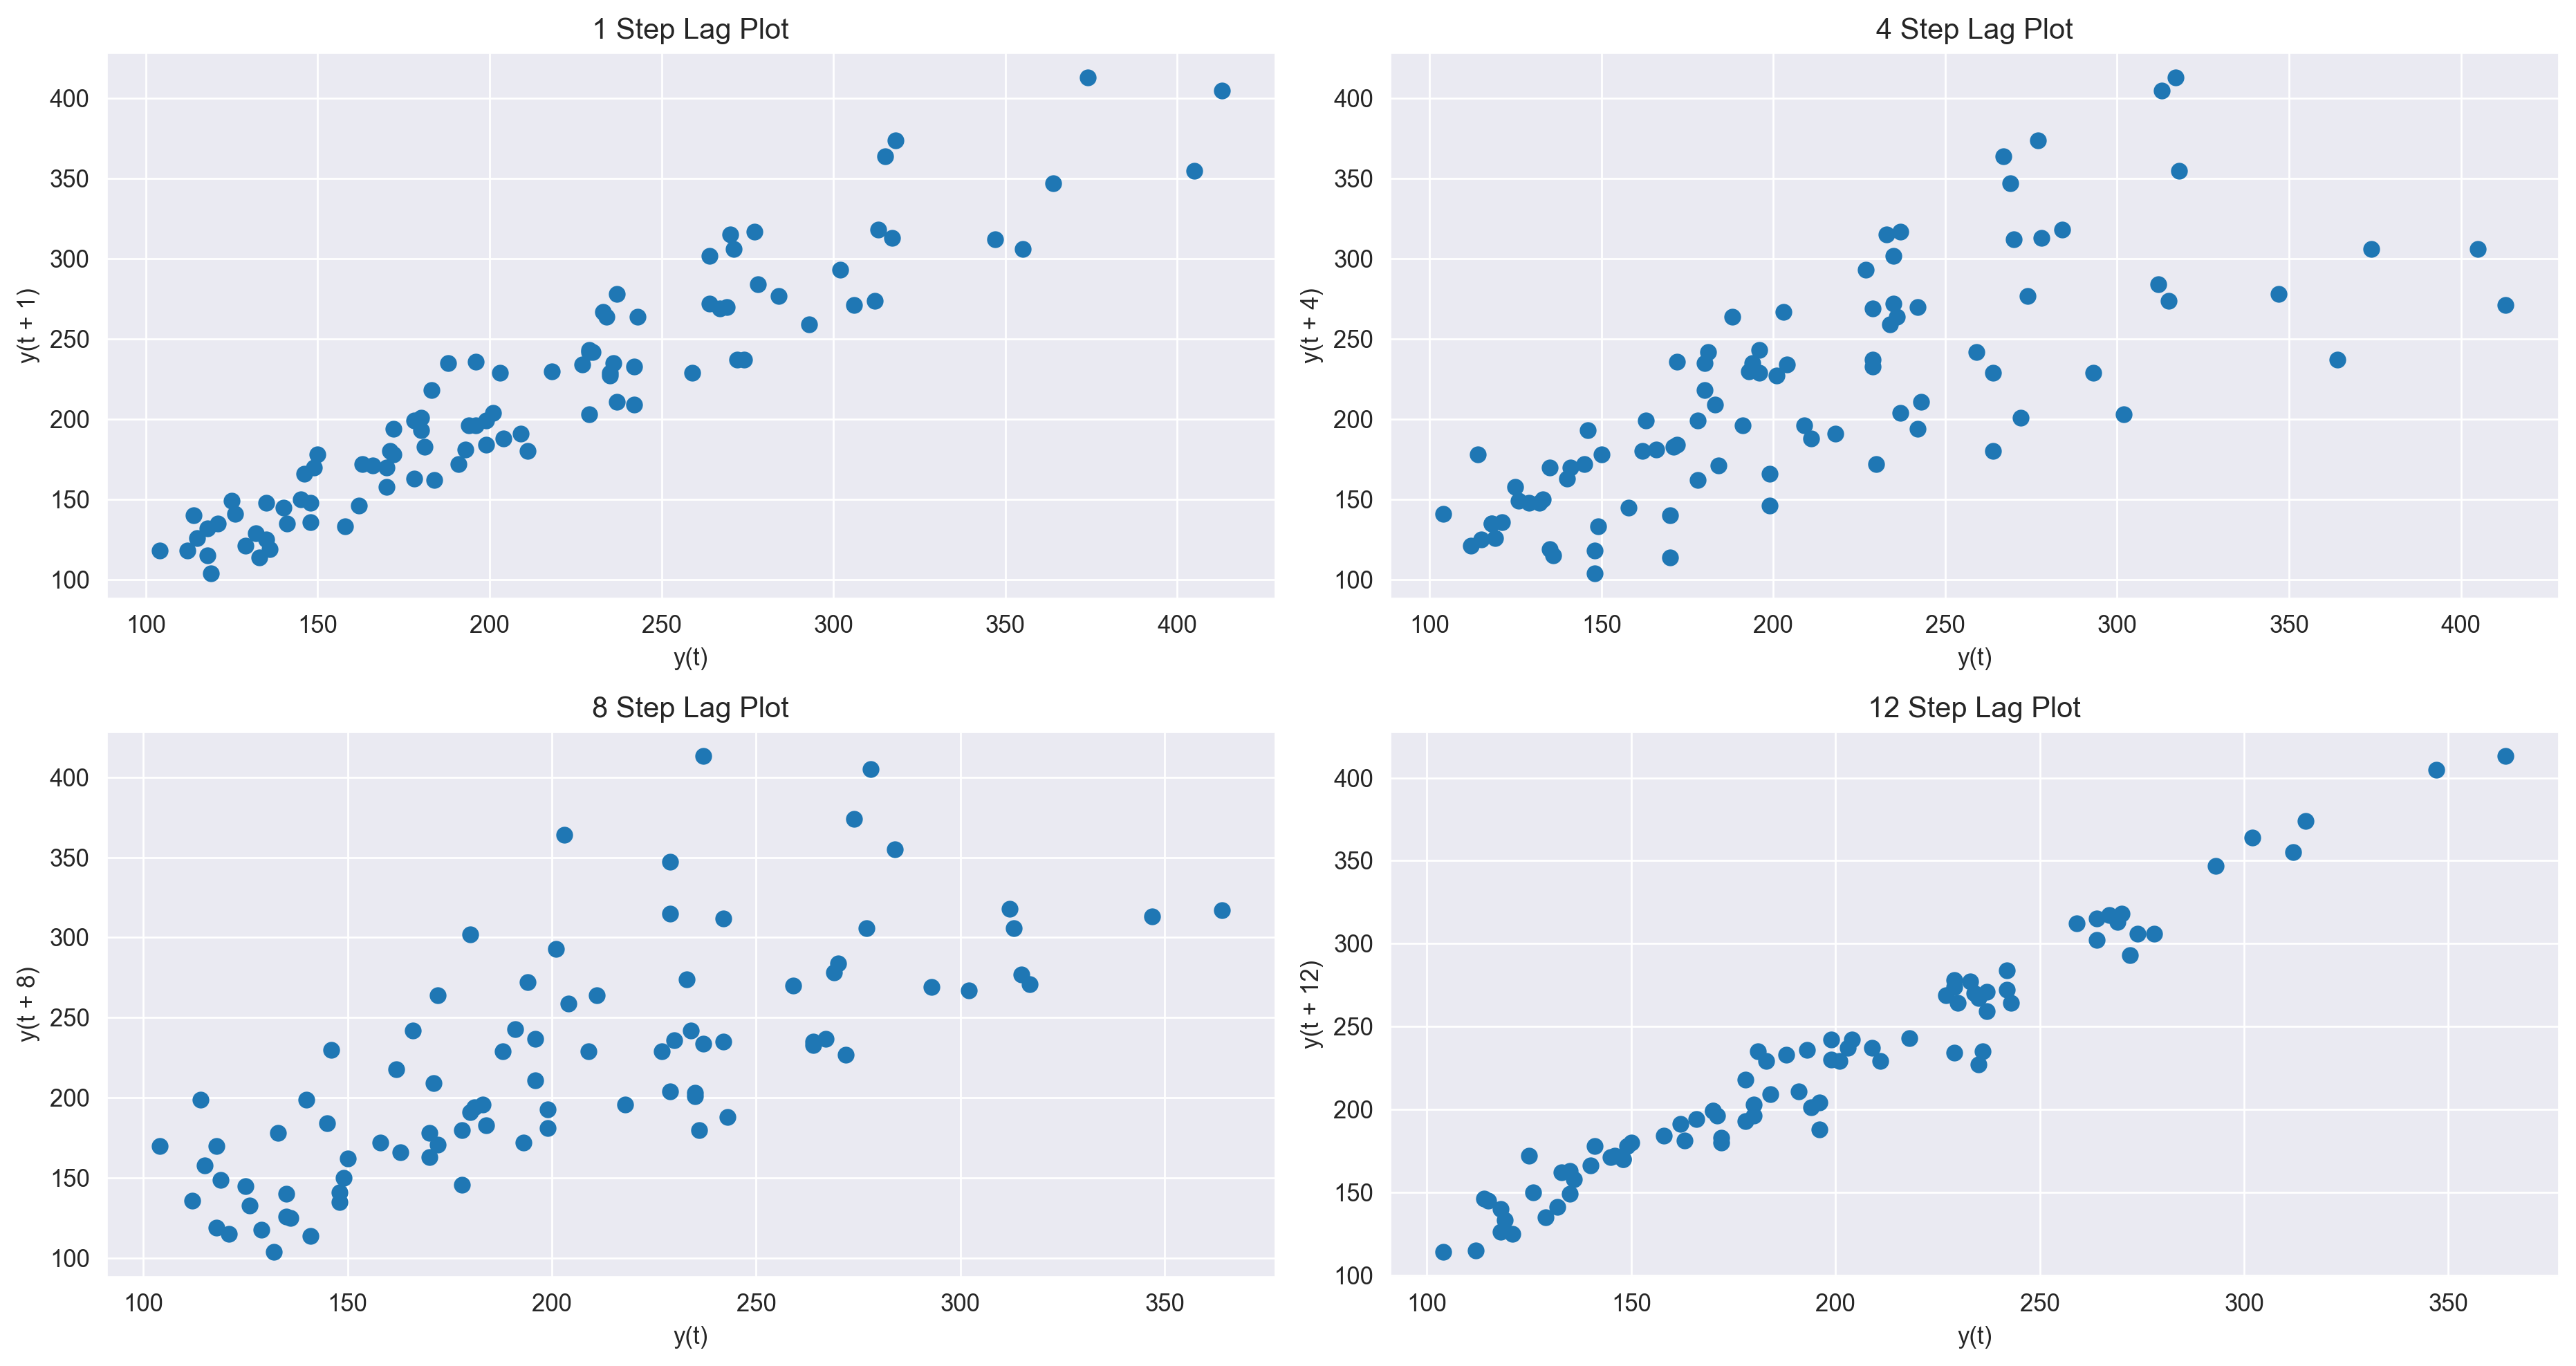

In [26]:
fig, ax = plt.subplots(2, 2, figsize = (15, 8))

plt.setp(ax[0, 0], title ='1 Step Lag Plot')
lag_plot(al.Passengers, lag=1, ax = ax[0, 0])

plt.setp(ax[0, 1], title ='4 Step Lag Plot')
lag_plot(al.Passengers, lag=4, ax = ax[0, 1])

plt.setp(ax[1, 0], title ='8 Step Lag Plot')
lag_plot(al.Passengers, lag=8, ax = ax[1, 0])

plt.setp(ax[1, 1], title ='12 Step Lag Plot')
lag_plot(al.Passengers, lag=12, ax = ax[1, 1])

plt.tight_layout()

# Converting Categorical Data To Numerical Data

In [27]:
al = pd.get_dummies(al, columns = ['month'])

al.rename(columns = {   'month_Apr':'Apr',
                        'month_Aug':'Aug',
                        'month_Dec':'Dec',
                        'month_Feb':'Feb',
                        'month_Jan':'Jan',
                        'month_Jul':'Jul',
                        'month_Jun':'Jun',
                        'month_Mar':'Mar',
                        'month_May':'May',
                        'month_Nov':'Nov',
                        'month_Oct':'Oct',
                        'month_Sep':'Sep'}, inplace = True)

al.head()

,Date,Passengers,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995,0,0,0,0,0,0,0,0,1,0,0,0


# Performing Squared and Log Transformation

In [28]:
al['t'] = np.arange(1,97)
al['squared_t'] = al['t']*al['t']

al['log_Passengers'] = np.log(al['Passengers'])
al['sqrt_Passengers'] = np.sqrt(al['Passengers'])

al.head()

,Date,Passengers,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,squared_t,log_Passengers,sqrt_Passengers
0,1995-01-01,112,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499,10.583005
1,1995-02-01,118,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685,10.862780
2,1995-03-01,132,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802,11.489125
3,1995-04-01,129,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812,11.357817
4,1995-05-01,121,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791,11.000000


# Comparing Original, Log And Sqrt Data With Dist-Plot

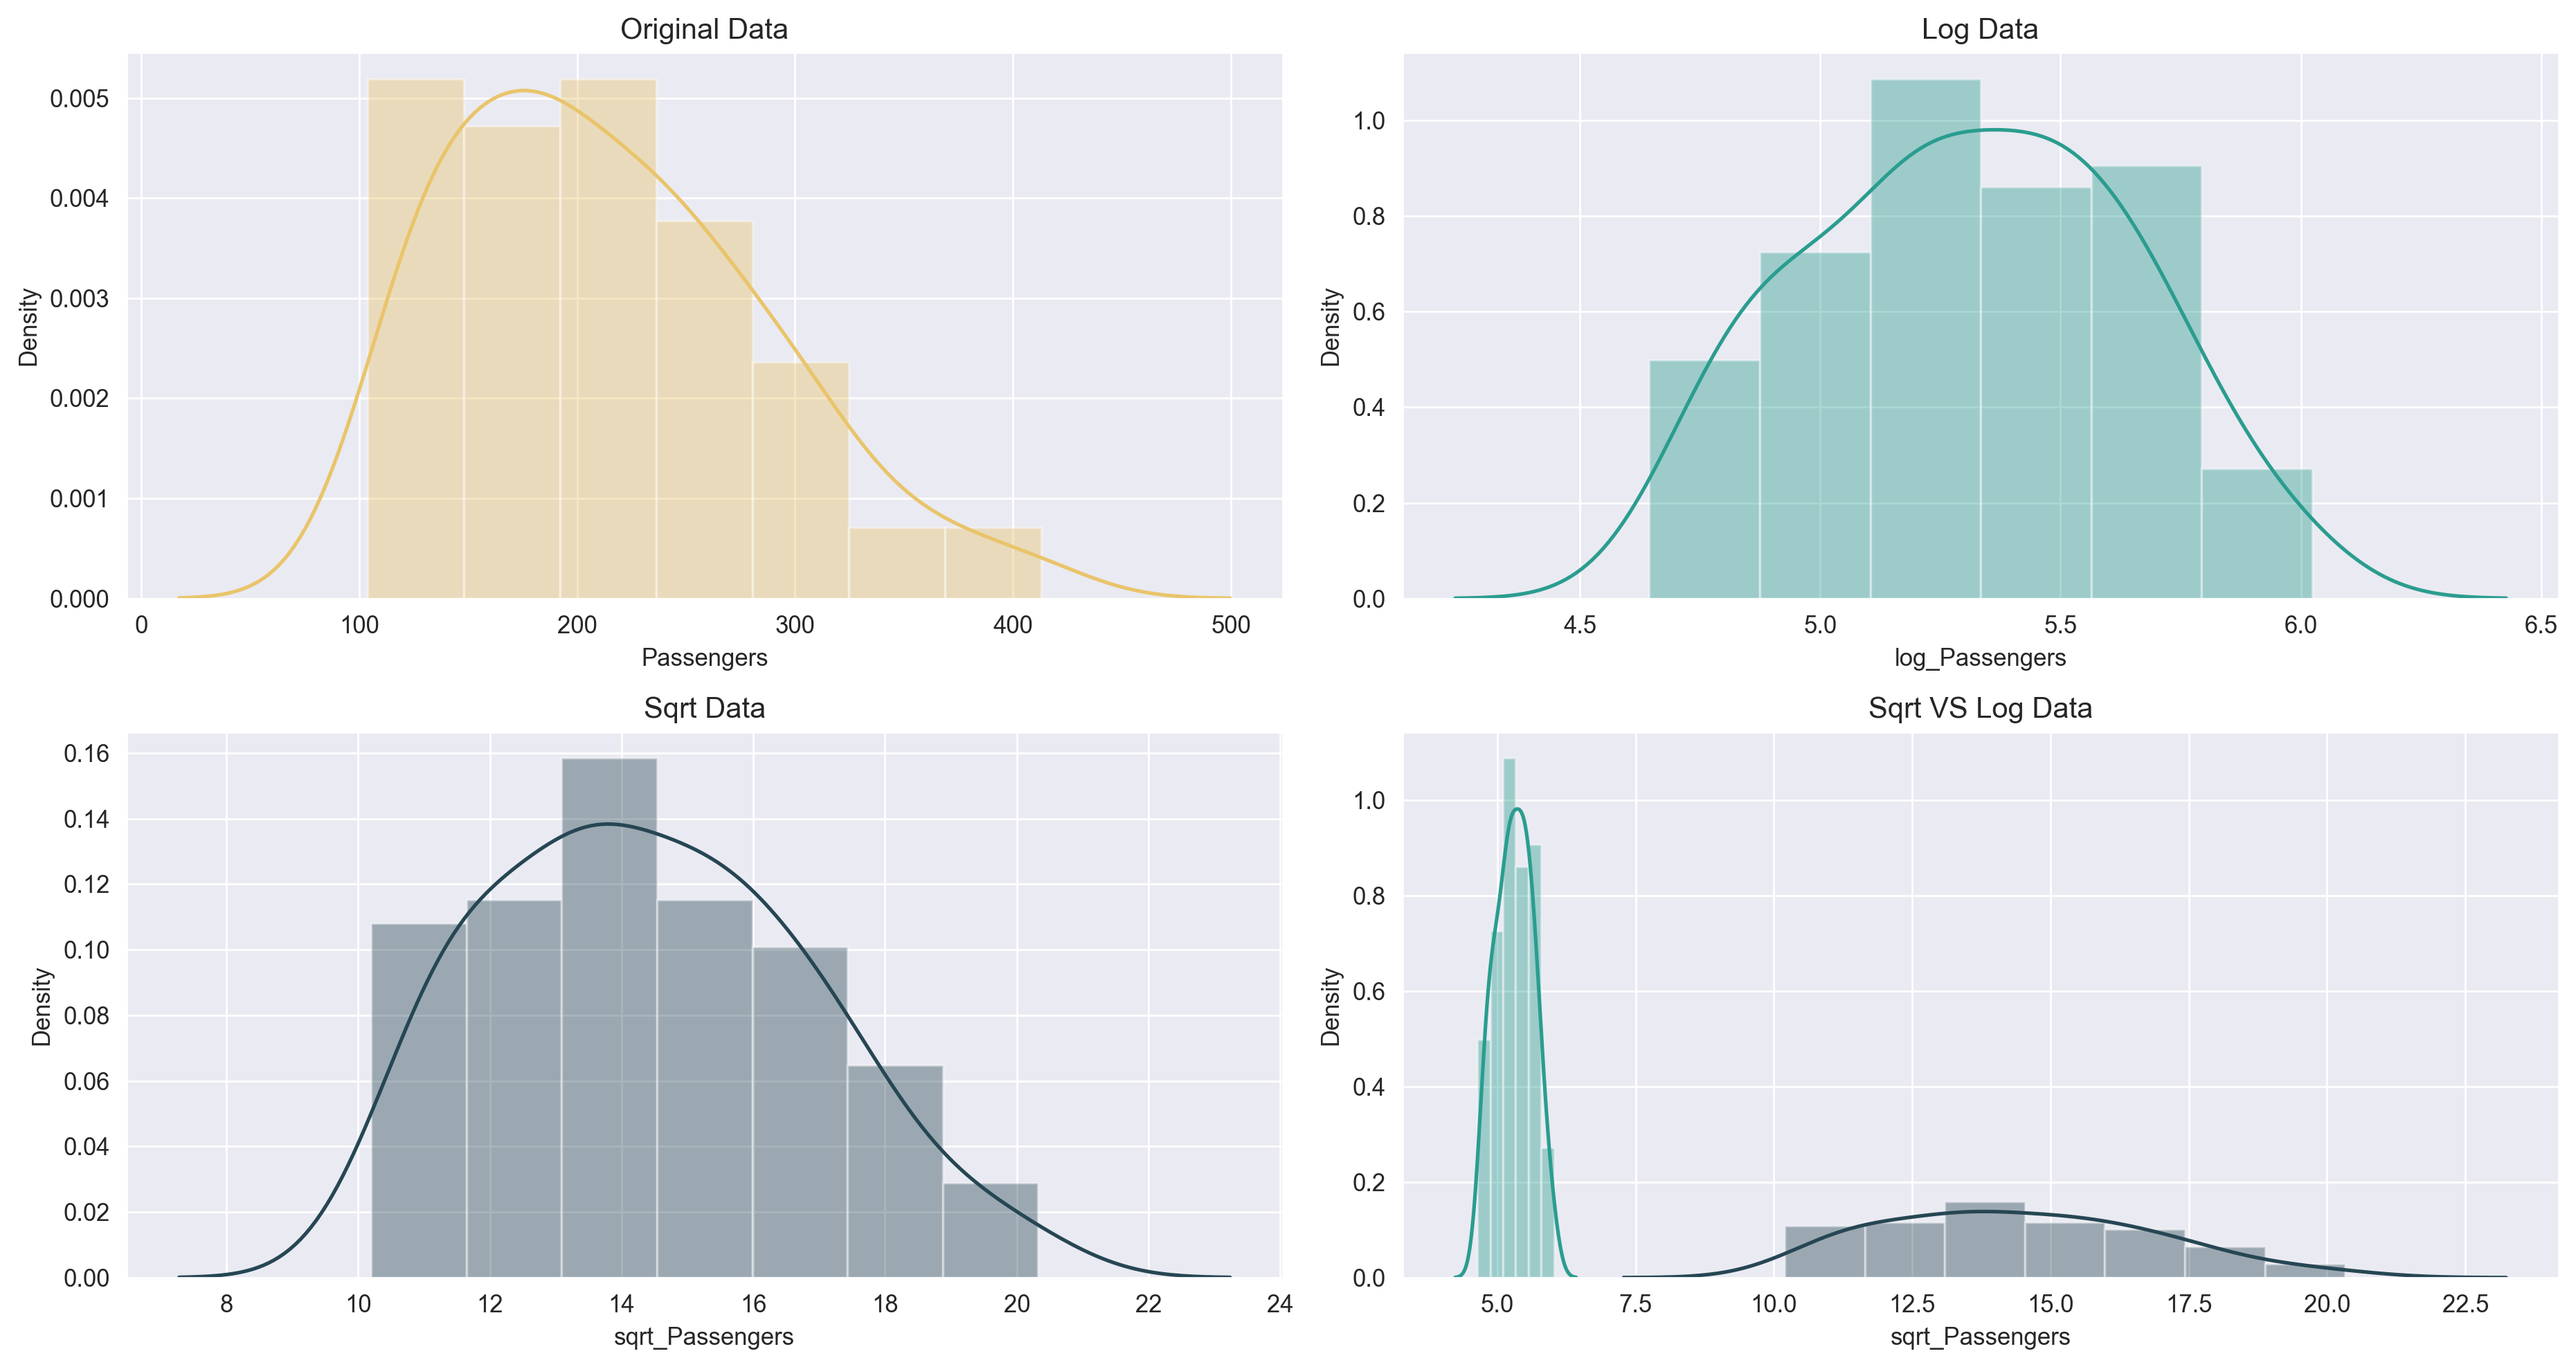

In [33]:
fig, ax = plt.subplots(2, 2, figsize=(15, 8))

plt.setp(ax[0, 0], title = 'Original Data')
sns.distplot(al['Passengers'], color = '#e9c46a', ax = ax[0, 0])

plt.setp(ax[0, 1], title = 'Log Data')
sns.distplot(al['log_Passengers'], color = '#2a9d8f', ax = ax[0, 1])

plt.setp(ax[1, 0], title = 'Sqrt Data')
sns.distplot(al['sqrt_Passengers'], color = '#264653', ax = ax[1, 0])

plt.setp(ax[1, 1], title = 'Sqrt VS Log Data')
sns.distplot(al['log_Passengers'], color = '#2a9d8f', ax = ax[1, 1])
sns.distplot(al['sqrt_Passengers'], color = '#264653', ax = ax[1, 1])


plt.tight_layout()

# Moving Average

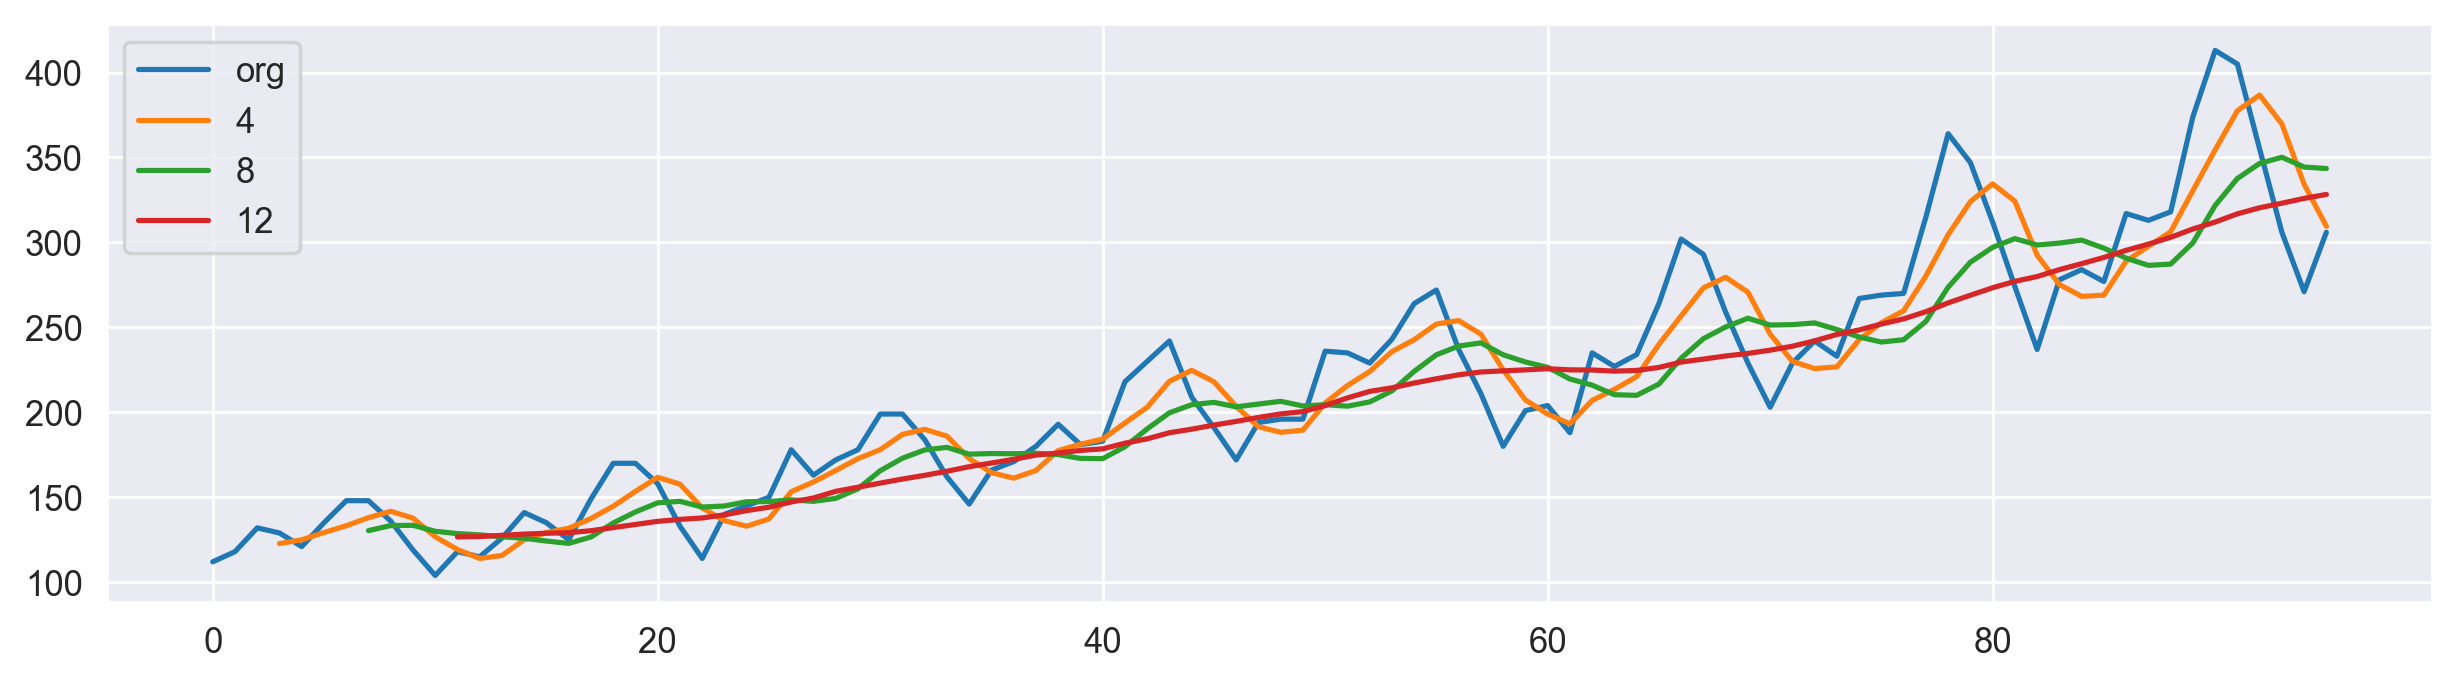

In [38]:
al.Passengers.plot(label="org")
for i in range(4,13,4):
    al["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

# First-Order Difference

In [39]:
fo = al[['Date', 'Passengers']]
fo.set_index('Date', inplace = True)

fo['First-Order'] = fo['Passengers'].diff(periods = 1)

fo.dropna(inplace=True)

fo.head()

,Passengers,First-Order
Date,,
1995-02-01,118,6.0
1995-03-01,132,14.0
1995-04-01,129,-3.0
1995-05-01,121,-8.0
1995-06-01,135,14.0


# Ploting Original Data VS First Order 

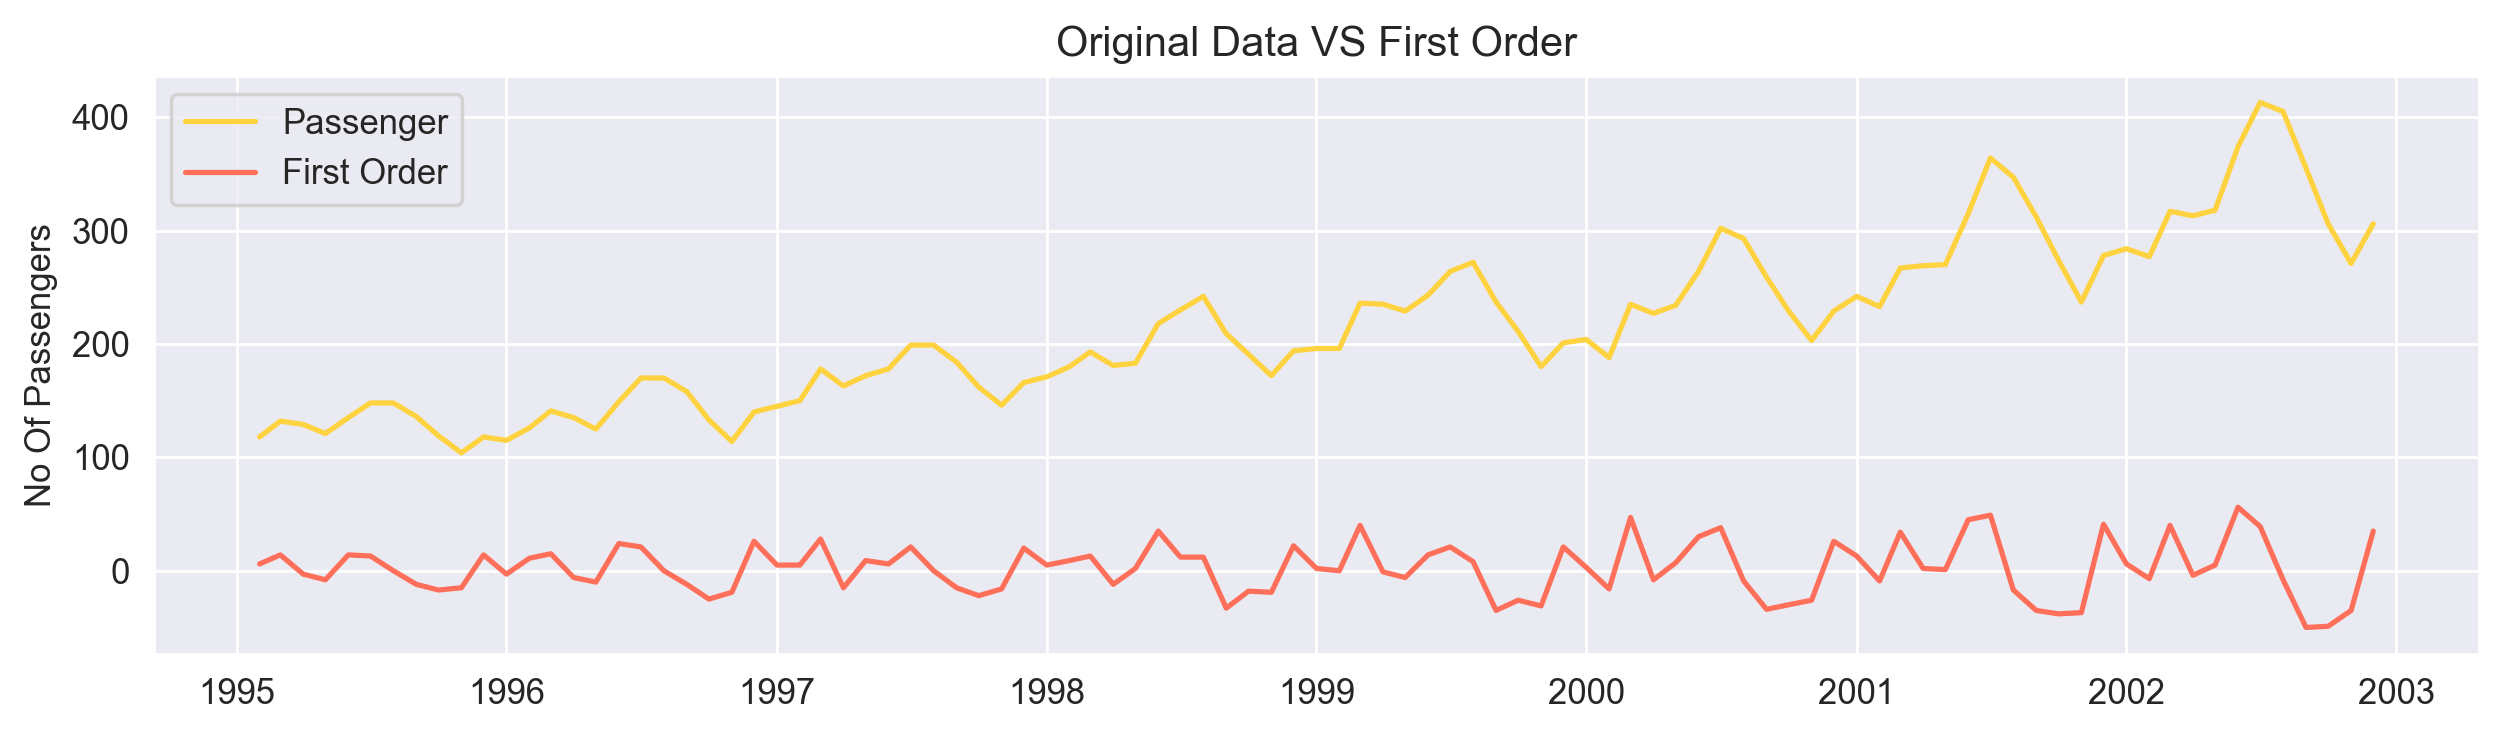

In [40]:
plt.title('Original Data VS First Order')
plt.ylabel('No Of Passengers')
plt.plot(fo['Passengers'], color = '#ffd23f', label = 'Passenger')
plt.plot(fo['First-Order'], color = '#ff6f59', label = 'First Order')
plt.legend()

# Ploting Autocorrelation And Partial Autocorrelation 

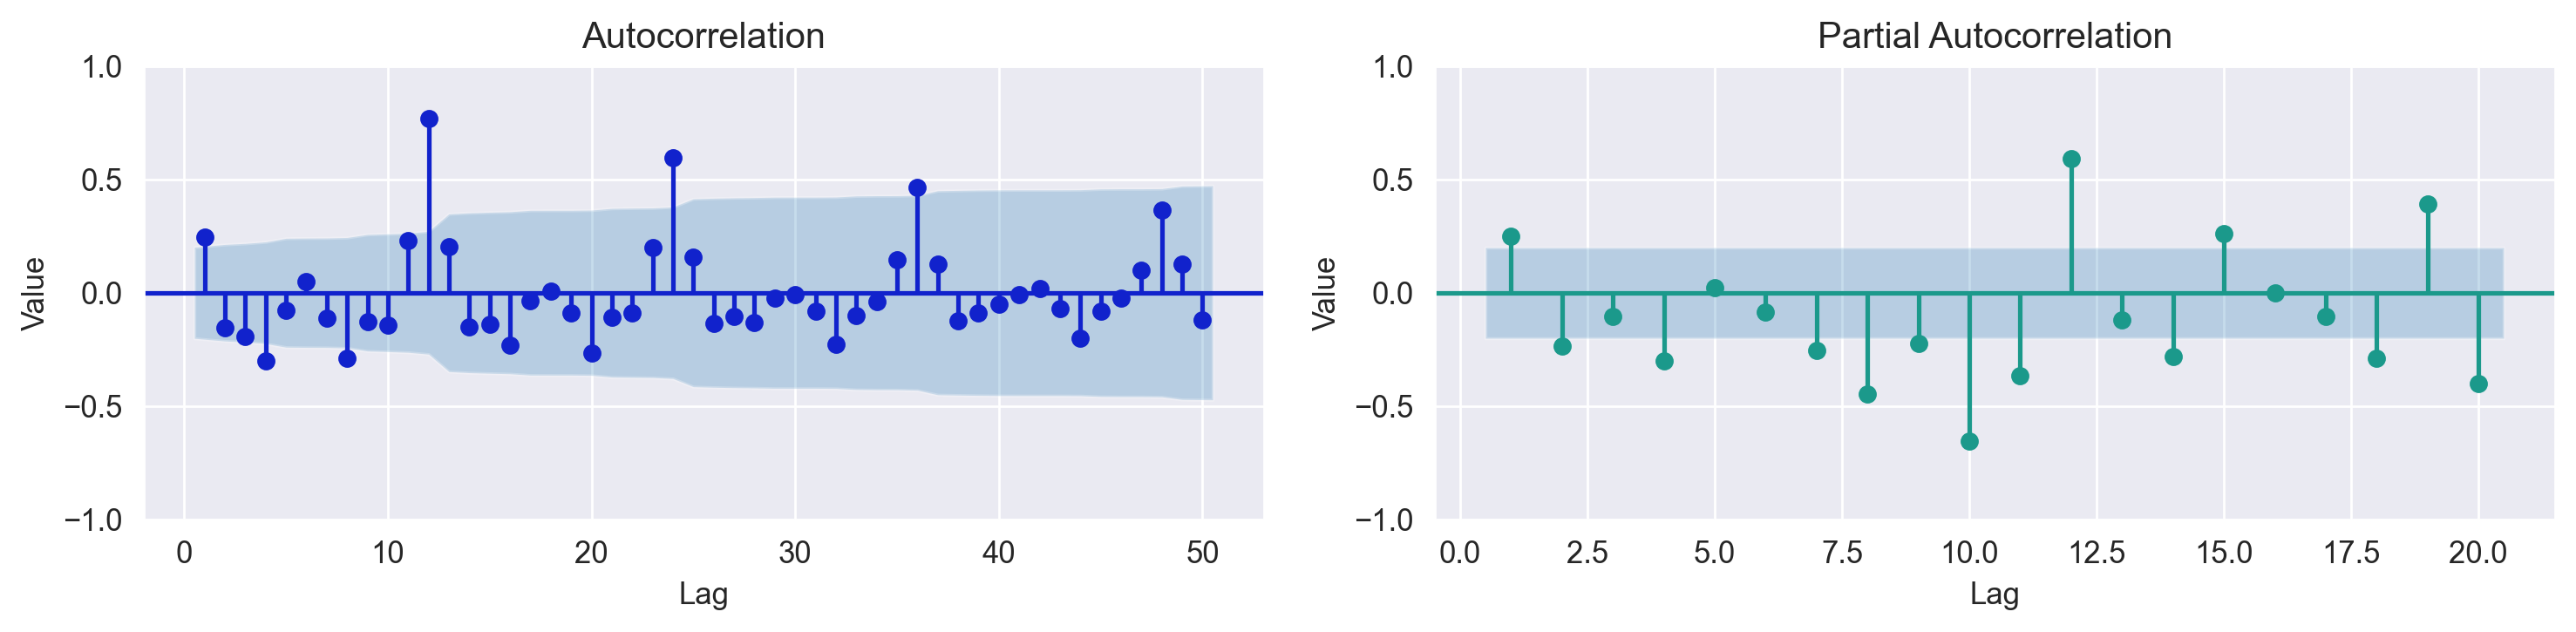

In [41]:
fig, ax = plt.subplots(ncols = 2)

plt.setp(ax[0], xlabel='Lag')
plt.setp(ax[0], ylabel='Value')
plot_acf(fo['First-Order'], lags=50, ax = ax[0], color='#1122cc', vlines_kwargs={"colors": '#1122cc'}, zero = False);

plt.setp(ax[1], xlabel='Lag')
plt.setp(ax[1], ylabel='Value')
plot_pacf(fo['First-Order'], ax = ax[1], color='#1b998b', vlines_kwargs={"colors": '#1b998b'}, zero = False);

plt.tight_layout()

# Splitting Data Into Training And Test

In [42]:
train = al.head(72)
test = al.tail(24)

# Ploting Training And Testing Data

<AxesSubplot:title={'center':'Training VS Testing'}, xlabel='Date', ylabel='Passengers'>

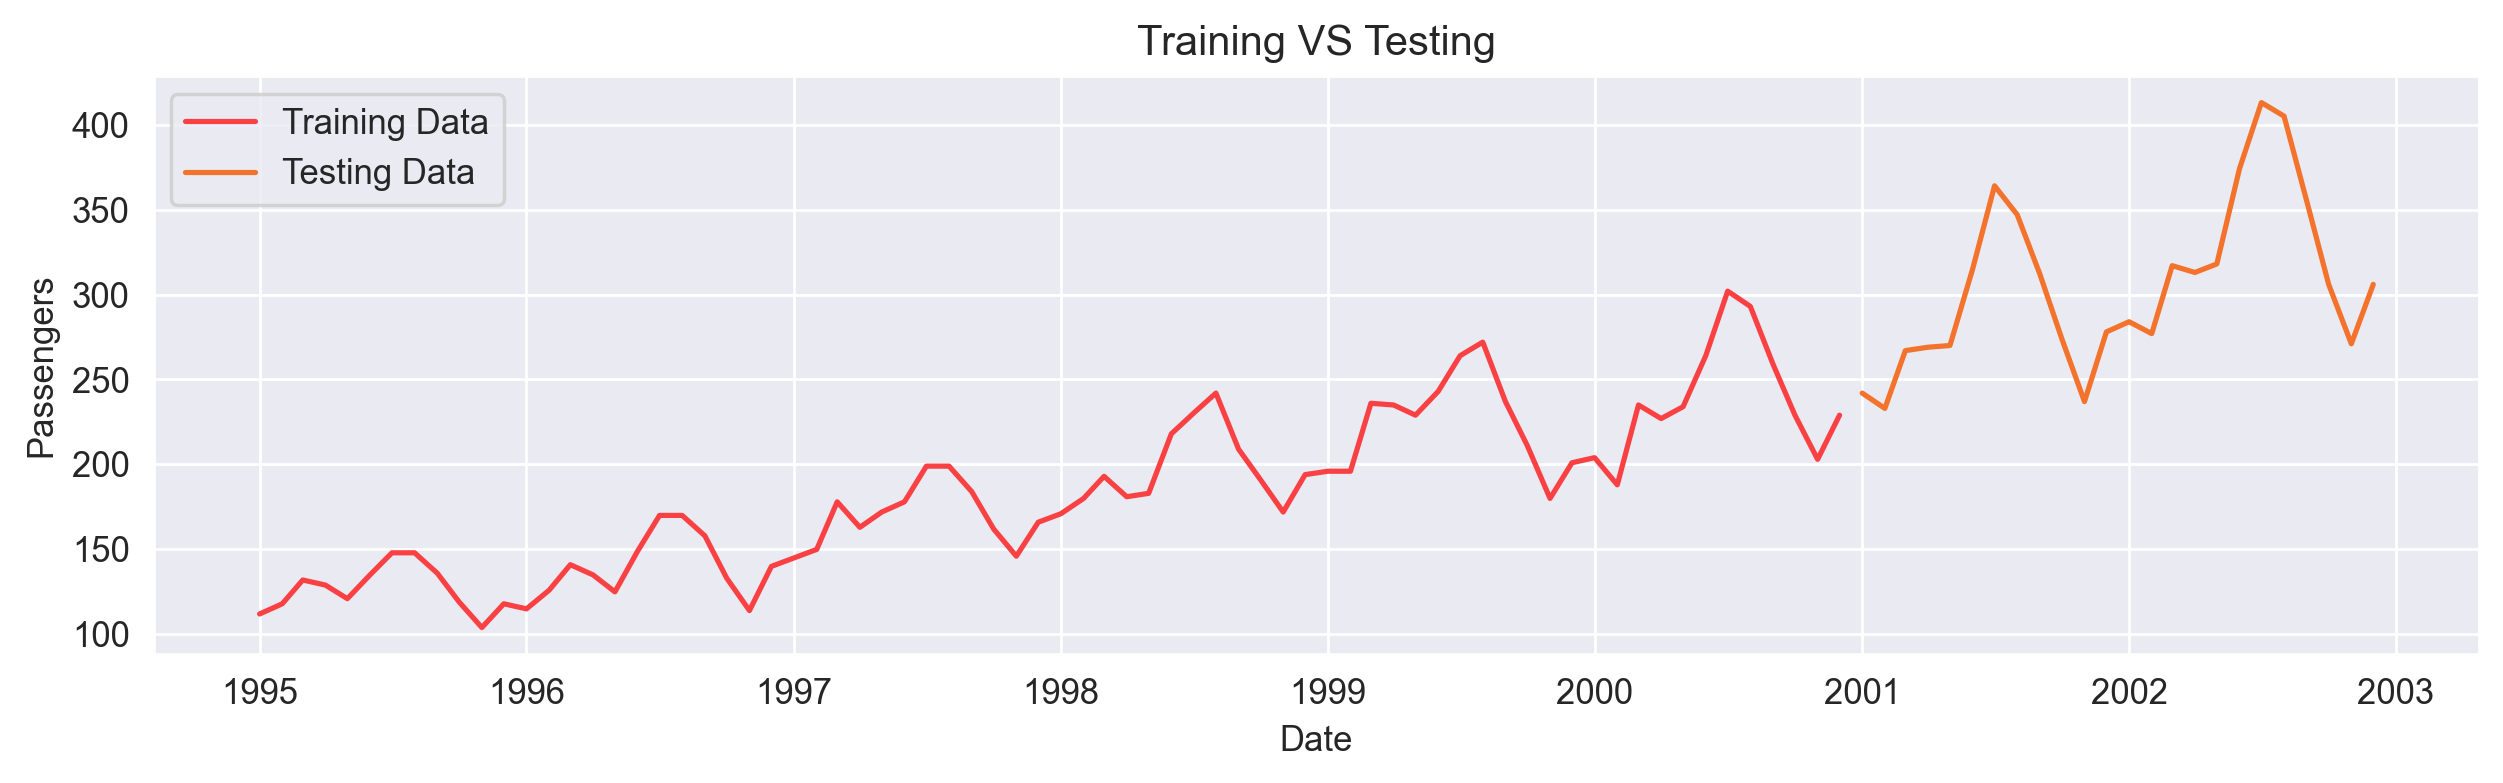

In [43]:
plt.title('Training VS Testing')
sns.lineplot(x=train['Date'], y = train['Passengers'], color = '#f94144', label = 'Training Data')
sns.lineplot(x=test['Date'], y = test['Passengers'], color = '#f3722c', label = 'Testing Data')

# Preparing Model

In [44]:
#Creating Linear Model

In [78]:
linear_model = smf.ols('Passengers~t',data=train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(mean_squared_error(test['Passengers'], pred_linear))
rmse_linear

51.667792995646266

In [50]:
#Creating Exponential Model

In [79]:
exp_model = smf.ols('log_Passengers~t',data=train).fit()
pred_exp =  pd.Series(exp_model.predict(pd.DataFrame(test['t'])))
rmse_exp = np.sqrt(mean_squared_error(test['Passengers'], pred_linear))
rmse_exp

51.667792995646266

In [54]:
#Creating Quadratic Model

In [80]:
Quad = smf.ols('Passengers~t+squared_t',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","squared_t"]]))
rmse_Quad = np.sqrt(mean_squared_error(test['Passengers'], pred_Quad))
rmse_Quad

51.99073640155383

In [58]:
#Creating Additive Seasonality Model

In [81]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(mean_squared_error(test['Passengers'], pred_add_sea))
rmse_add_sea

127.2645156532034

In [62]:
#Creating Additive Seasonality Quadratic Model

In [82]:
add_sea_Quad = smf.ols('Passengers~t+squared_t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','squared_t']]))
rmse_add_sea_quad = np.sqrt(mean_squared_error(test['Passengers'], pred_add_sea_quad))
rmse_add_sea_quad

35.241608485945726

In [69]:
#Creating Multiplicative Seasonality Model

In [84]:
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(mean_squared_error(test['Passengers'], pred_Mult_sea))
rmse_Mult_sea

304.81913307091037

In [72]:
#Creating Multiplicative addditive seasonality Model

In [85]:
Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(mean_squared_error(test['Passengers'], pred_Mult_add_sea))
rmse_Mult_add_sea

304.28038960808743

# Comparing All Model

In [86]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse = pd.DataFrame(data)

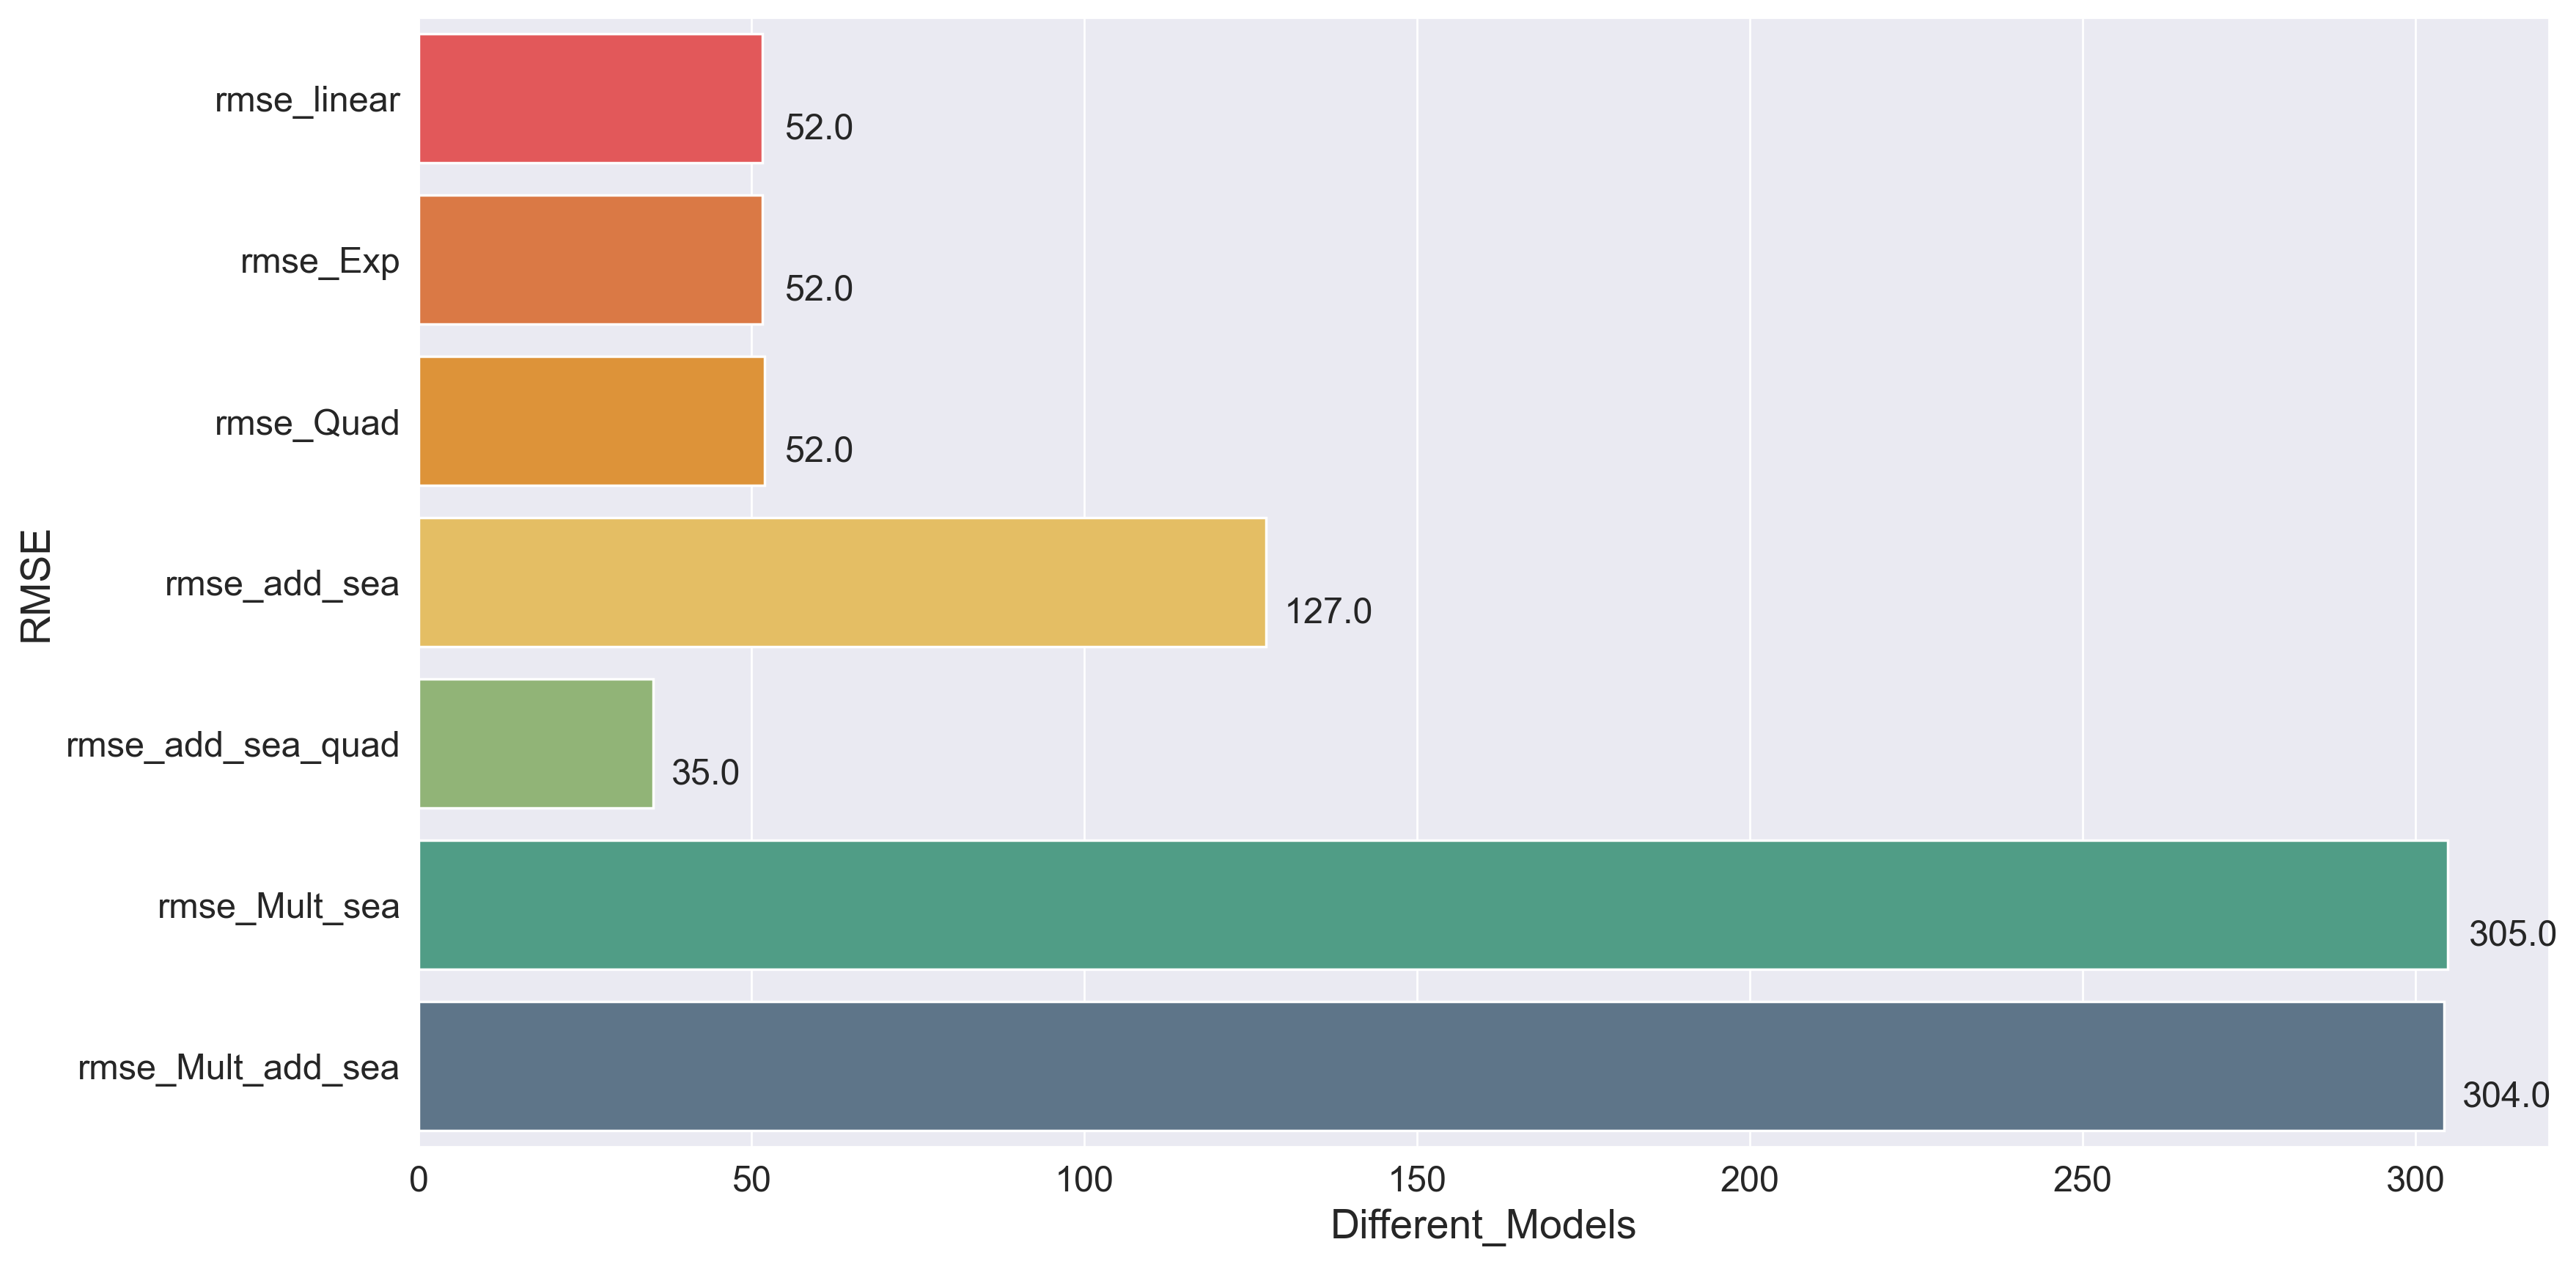

In [87]:
fig, ax = plt.subplots(1,1, figsize=(15,8))
sns.barplot(x = 'RMSE_Values', y = 'MODEL', data = table_rmse, palette = ['#f94144', '#f3722c', '#f8961e', '#f9c74f', '#90be6d', '#43aa8b', '#577590'], ax = ax)
ax.set_xlabel('Different_Models', size=16)
ax.set_ylabel('RMSE', size=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

for i, v in enumerate(np.round(table_rmse.RMSE_Values.values,0)):
    ax.text(v + 3, i + .25, str(v), fontsize= 14)